In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from typing import Tuple
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
from mlxtend.plotting import plot_decision_regions
import graphviz
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
df_titanic = pd.read_csv("./../../train.csv")

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic = pd.read_csv("./../../train.csv")
df_titanic['Name Length'] = df_titanic['Name'].map(lambda name: len(name))
y_titanic = df_titanic['Survived'].map(lambda s: 'Survived' if s == 1 else 'Death')
del df_titanic['Name']
del df_titanic['Ticket']
del df_titanic['Survived']
df_titanic['Survived'] = y_titanic
df_titanic.head()
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(df_titanic.iloc[:,:-1], 
                                                                                    df_titanic.iloc[:,-1], test_size=0.33, 
                                                                                    random_state=42)
col_names = [*df_titanic.columns[:]]
col_names

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Name Length',
 'Survived']

In [5]:
df_titanic = pd.read_csv("./../../test.csv")
print(df_titanic.head())
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(df_titanic.iloc[:,:-1], 
                                                                                    df_titanic.iloc[:,-1], test_size=0.33, 
                                                                                    random_state=42)
col_names = [*df_titanic.columns[:]]
col_names

   age  job  marital  education  default  housing  loan  contact  month  \
0   44    0        0          0        0        0     0        0      0   
1   30    2        2          0        1        0     0        0      4   
2   39    0        2          4        1        0     0        0      5   
3   55    2        0          2        1        1     0        0      0   
4   26    5        0          3        1        1     1        1      2   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp_var_rate  \
0            0  ...         1    999         0         0           1.4   
1            2  ...         8    999         0         0           1.4   
2            1  ...         1    999         0         0          -1.8   
3            3  ...         3    999         0         0           1.4   
4            3  ...         1    999         0         0           1.4   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          93.444          -36.1      4.96

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [6]:
from hdtree import HDTreeClassifier
from information_measure import EntropyMeasure
from split_rule import LessThanHalfOfSplit, SingleCategorySplit,FixedValueSplit, TwentyQuantileSplit, LogisticRegressionSingleSplit, AbstractQuantileSplit, TwentyQuantileRangeSplit, TwoQuantileRangeSplit, LogisticRegressionDoubleCategorySplit

In [55]:
hdtree_titanic = HDTreeClassifier(
                    allowed_splits=[TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=10,
                    min_samples_at_leaf=150)

In [56]:
type(X_titanic_train)

pandas.core.frame.DataFrame

In [57]:
X_train_final = pd.concat([X_titanic_train, y_titanic_train], axis=1)
X_test_final = pd.concat([X_titanic_test, y_titanic_test], axis=1)

In [58]:
hdtree_titanic.fit(X_train_final.values, y_titanic_train.values)
print(hdtree_titanic.score(X_test_final.values, y_titanic_test.values))
print(hdtree_titanic.score(X_train_final.values, y_titanic_train.values))

0.8907686649503493
0.8992571117956152


In [59]:
preds = hdtree_titanic.predict(X_test_final.values)

In [60]:
temp = 0
for i in preds: 
    # if i == 'Death':
    #     temp += 1
    temp += int(i)
temp

105

In [61]:
preds

array(['0', '0', '1', ..., '0', '0', '0'], dtype='<U1')

In [62]:
print(preds.shape)
preds = set(list(preds))
preds

(2719,)


{'0', '1'}

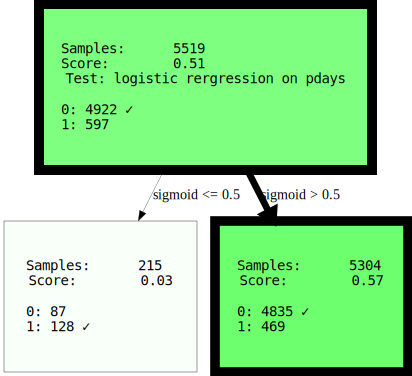

In [63]:
hdtree_titanic.generate_dot_graph()

In [64]:
predictions = set()
for i in X_train_final.values:
    predictions.add(hdtree_titanic.predict(i.reshape(1, -1))[0])

In [65]:
predictions

{'0', '1'}

In [66]:
len(col_names)

21

In [32]:
hdtree_titanic = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [33]:
hdtree_titanic.fit(X_train_final.values, y_titanic_train.values)
print(hdtree_titanic.score(X_test_final.values, y_titanic_test.values))
print(hdtree_titanic.score(X_train_final.values, y_titanic_train.values))

0.8907686649503493
0.9008878420003624


In [34]:
preds = hdtree_titanic.predict(X_test_final.values)
temp = 0
for i in preds: 
    # if i == 'Death':
    #     temp += 1
    temp += int(i)
temp

151

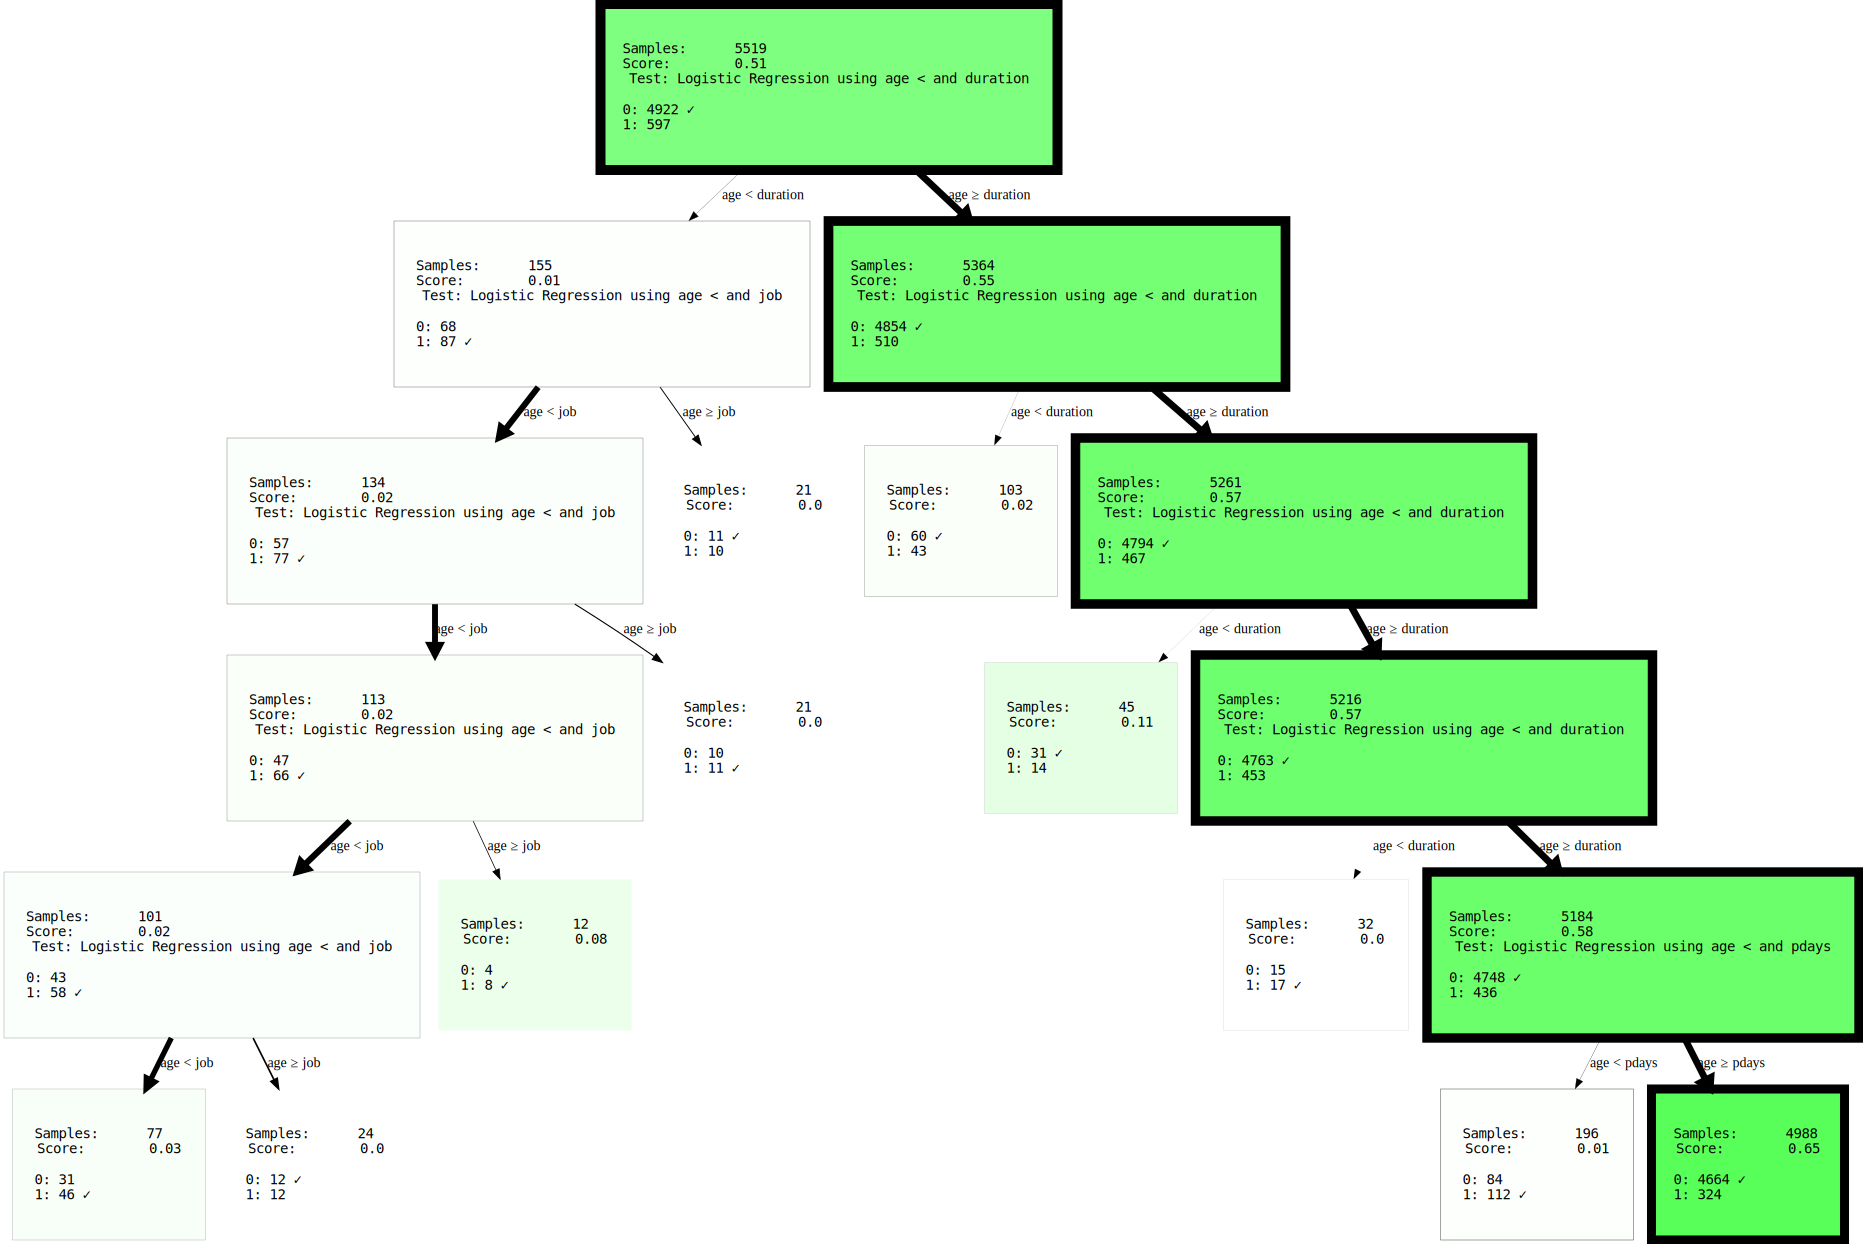

In [35]:
hdtree_titanic.generate_dot_graph()

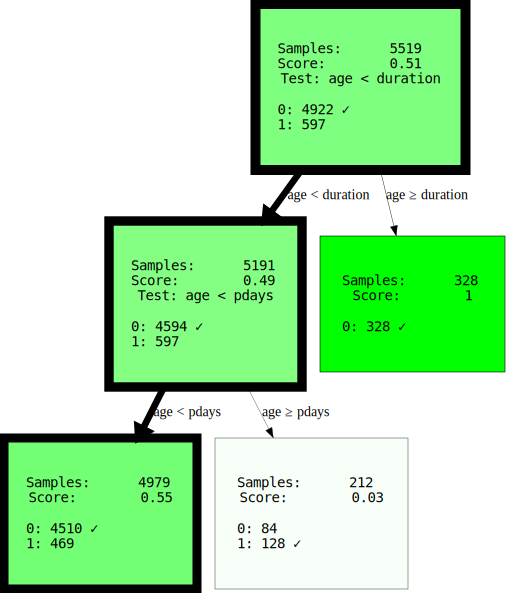

In [83]:
hdtree_titanic.generate_dot_graph()